# Some dropsonde quicklook examples

In [9]:
from halodrops.plotting import quicklooks as ql

### Test plotting for EUREC4A data

In [2]:
import eurec4a
from datetime import datetime, date
from collections import defaultdict
from functools import reduce



# Access EUREC4A catalog
cat = eurec4a.get_intake_catalog(use_ipfs=False)

# Get flight segments
meta = eurec4a.get_flight_segments()

segments = [{**s,
             "platform_id": platform_id,
             "flight_id": flight_id
            }
            for platform_id, flights in meta.items()
            for flight_id, flight in flights.items()
            for s in flight["segments"]
           ]

segments_by_segment_id = {s["segment_id"]: s for s in segments}
segments_ordered_by_start_time = list(sorted(segments, key=lambda s: s["start"]))

circles_Jan24 = [s["segment_id"]
                 for s in segments_ordered_by_start_time
                 if "circle" in s["kinds"]
                 and s["start"].date() == date(2020,1,24)
                 and s["platform_id"] == "HALO"
                ]

first_circle_Jan24 = circles_Jan24[0]

dropsonde_ids = segments_by_segment_id[first_circle_Jan24]["dropsondes"]["GOOD"]

Load dropsonde dataset and select first circle of January 24, 2020:

In [3]:
ds = cat.dropsondes.JOANNE.level3.to_dask()

# Select dropsondes from Jan 24 2020
mask_sondes_first_circle_Jan24 = reduce(lambda a, b: a | b, [ds.sonde_id==d for d in dropsonde_ids])
ds_sondes_first_circle_Jan24 = ds.isel(sonde_id=mask_sondes_first_circle_Jan24)

/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


Access satellite images:

In [10]:
satellite_image = ql.get_satellite_data(ds_flight=ds_sondes_first_circle_Jan24,
                         satellite_name="goes16", channel = 13, product="ABI-L2-CMIPF",
                         extent = (-62,-48,10,20))

/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/kerchunk/combine.py:269: UserWarning: Concatenated coordinate 't' contains less than expectednumber of values across the datasets: [6.33133503e+08]
  warnings.warn(
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/gogoesgone/processing.py:28: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  self.dataset = xr.open_dataset(filepath, engine="zarr")
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages

## Plot dropsonde launch locations on a map (over a GOES-16 image)

By default the satellite image will be taken at the average launch time from all dropsondes in the plot. By default the colormap is chosen to show the flight altitude, but it can be any variable with dimensions (`sonde_id`).

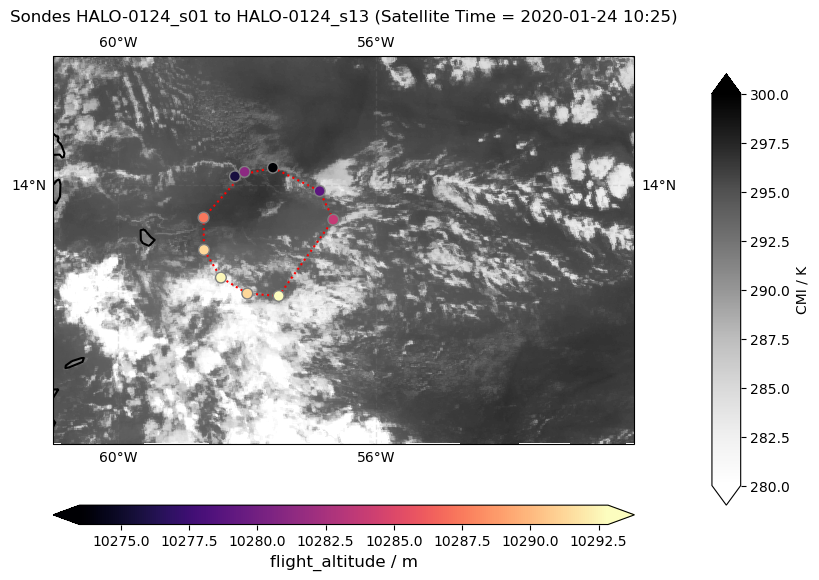

In [5]:
ql.launch_locations_map(ds_flight=ds_sondes_first_circle_Jan24, save_filepath="/home/m/m300931/", 
                        satellite_data=satellite_image)

## Plot latitude-time quantities

By default the colormap is chosen to show the flight altitude, but it can be any variable with dimensions (`sonde_id`).

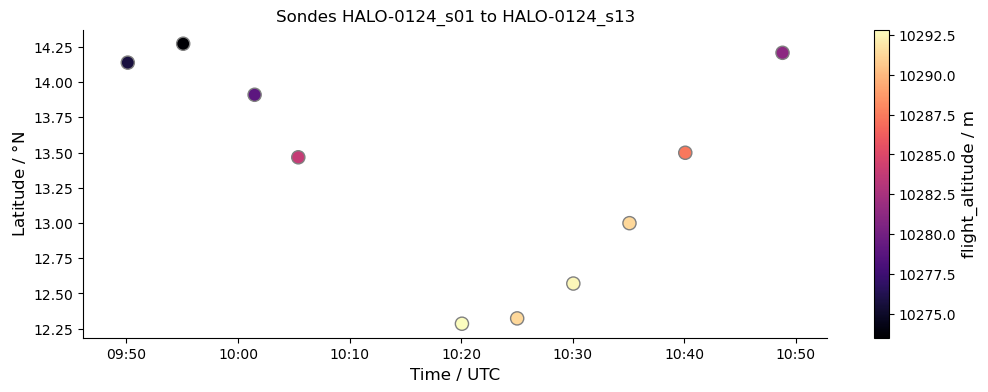

In [6]:
ql.plot_lat_time(ds_flight=ds_sondes_first_circle_Jan24, save_filepath="/home/m/m300931/")

## Plot vertical profiles
The variables and number of plots can be adjusted by the user. By default the quicklook shows temperature, potential temperature, relative humidity, and wind speed.

/home/m/m300931/halodrops/src/halodrops/plotting/quicklooks.py:280: RuntimeWarning: Mean of empty slice
  np.nanmean(d, axis=0),


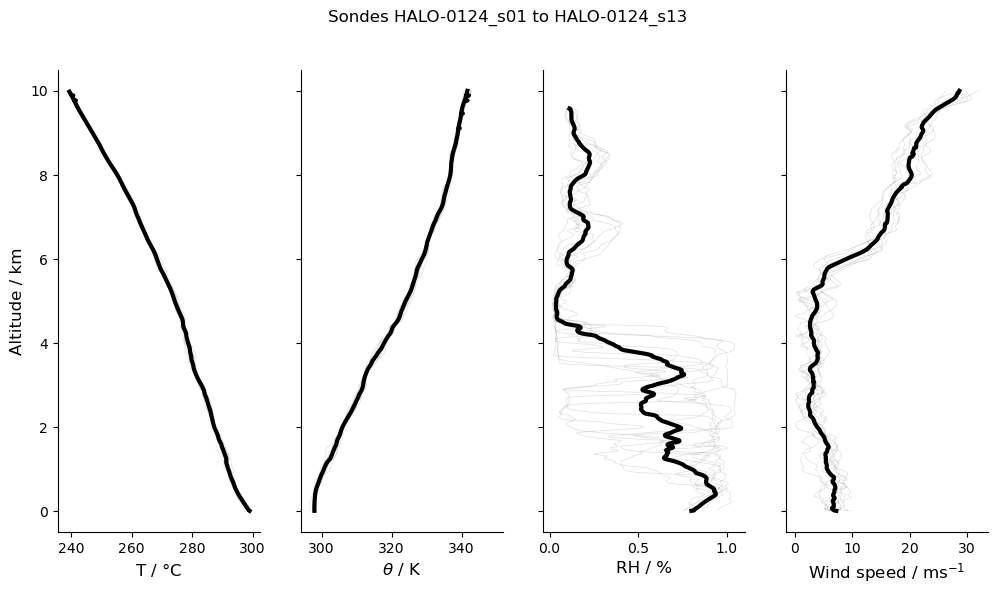

In [7]:
ql.plot_profiles(ds_flight=ds_sondes_first_circle_Jan24, save_filepath="/home/m/m300931/")

## Plot dropsonde drift

Plotting drift in lat and lon...


/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/m/m300931/mambaforge/envs/halodrops_env/lib/python3.10/site-packag

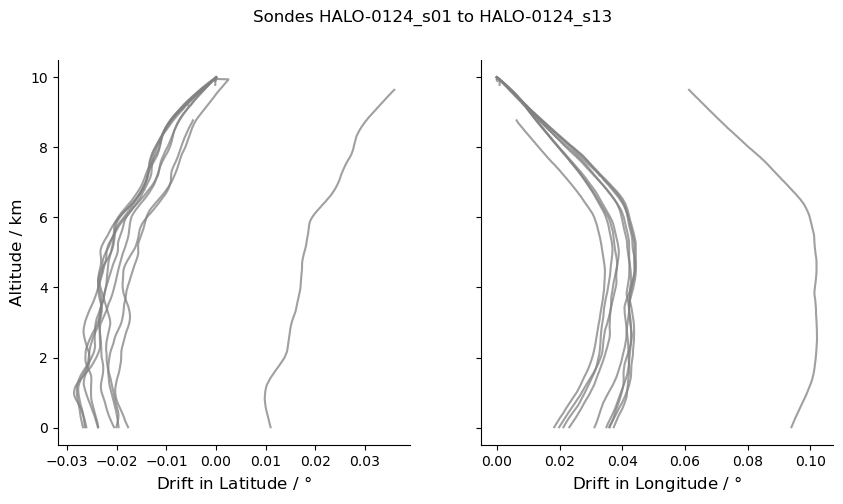

In [12]:
ql.drift_plots(ds_flight=ds_sondes_first_circle_Jan24, save_filepath="/home/m/m300931/")

## Saving plots in one pdf